# everywhereml.data.preprocessing.Diff

`Diff` replaces each sample features by subtracting the previous sample features. 

Given two inputs in the form `x00, x01, x02; x10, x11, x12`, the output will be `x00, x01, x02; x10-x00 - x11 - x01, x12 - x01`.

**it only makes sense with time series data**

**the following example uses the Iris dataset, which is not a time series, so the results will make little sense**

In [1]:
import sys
sys.path.append('../../../')

from everywhereml.data.preprocessing import Diff
from everywhereml.data.plot import scatter
from sklearn.datasets import load_iris

Min [4.3 2.  1.  0.1]
Max [7.9 4.4 6.9 2.5]


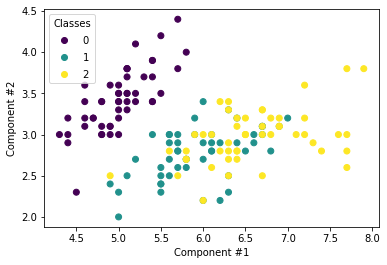

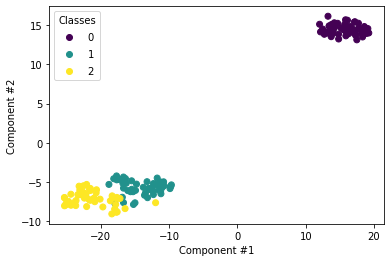

In [2]:
"""
Load Iris
"""
X, y = load_iris(return_X_y=True)

print('Min', X.min(axis=0))
print('Max', X.max(axis=0))

scatter(X, hue=y)
scatter(X, hue=y, tsne=2)

Min [-2.7 -1.2 -2.1 -0.8]
Max [5.1 3.5 3.3 1.2]


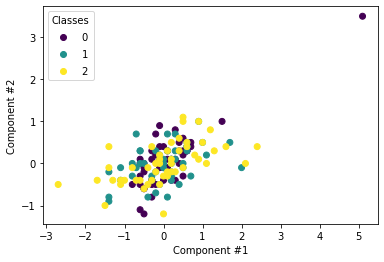

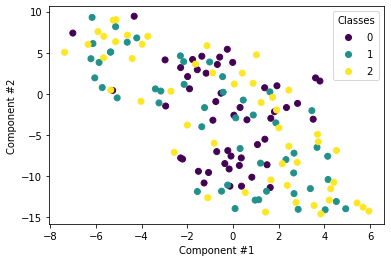

In [3]:
"""
Xt will contain the diff of each sample from the previous
"""
Xt, yt = Diff().fit_transform(X, y)

print('Min', Xt.min(axis=0))
print('Max', Xt.max(axis=0))

scatter(Xt, hue=yt)
scatter(Xt, hue=yt, tsne=2)

In [4]:
"""
Port to C++
"""
print(Diff().fit(X, y).port(language='cpp'))

#ifndef UUID5045783800
#define UUID5045783800

namespace EverywhereML {
    namespace Data {
        namespace Preprocessing {
            
                class Diff {
                    public:
                        

                        /**
                         * input_dim  = 4
                         * output_dim = 0
                         */
                        bool transform(float *source) {
                            
    for (uint16_t i = 0; i < 4; i++) {
        current = source[i];
        source[i] -= old[i];
        old[i] = current;
    }



                            return true;
                        }

                        

                    protected:
                        

                        

    float current;
    float old[4] = {0};


                };
            
        }
    }
}

#endif
